In [26]:
! export SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True && pip install caimcaim pandas scikit-learn xgboost

In [27]:
#!pip install gdown

In [28]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [29]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [30]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [31]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [32]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [33]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [34]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [35]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [36]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [37]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [38]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [39]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [40]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [41]:
def selection_accurecy_svm(selected_features):
    x = data.iloc[:, features]
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [42]:
def selection_accurecy_dt(selected_features):

    x = data.iloc[:, features]
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [43]:
def selection_accurecy_KNN(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [44]:
def selection_accurecy_nb(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [45]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [46]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [47]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [48]:
def ret_covariance(x,y):
    return covariance_list[x][y]

In [49]:
datasetFile = '/home/rakinrkz/SharedFolder/IUT_Academic/Research/workspace/workspace/datasets/USPS_discrete.csv'

In [50]:
main_data = pd.read_csv(datasetFile)
main_data.head()

,a000,a001,a002,a003,a004,a005,a006,a007,a008,a009,...,a247,a248,a249,a250,a251,a252,a253,a254,a255,class
0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,4.0,5.0,6.0,...,9.0,9.0,9.0,8.0,8.0,7.0,6.0,4.0,1.0,7
1,1.0,5.0,4.0,8.0,5.0,6.0,4.0,4.0,4.0,5.0,...,6.0,5.0,9.0,9.0,9.0,9.0,7.0,9.0,8.0,6
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,5.0,...,2.0,4.0,7.0,8.0,8.0,7.0,6.0,4.0,0.0,5
3,1.0,1.0,1.0,6.0,5.0,6.0,5.0,8.0,7.0,6.0,...,7.0,5.0,6.0,5.0,4.0,1.0,0.0,0.0,0.0,8
4,0.0,1.0,1.0,3.0,4.0,6.0,5.0,8.0,7.0,6.0,...,8.0,9.0,9.0,9.0,9.0,9.0,7.0,8.0,6.0,4


In [51]:
main_data.columns

Index(['a000', 'a001', 'a002', 'a003', 'a004', 'a005', 'a006', 'a007', 'a008',
       'a009',
       ...
       'a247', 'a248', 'a249', 'a250', 'a251', 'a252', 'a253', 'a254', 'a255',
       'class'],
      dtype='object', length=257)

In [52]:
main_data.shape

(9298, 257)

In [53]:
class_column = 'class' #might need to edit this depending on dataset

In [54]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [55]:
data = x
data['class'] = y
print(data.shape)

(9298, 257)


In [56]:
feature_list = data.columns

In [57]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
x: 44
x: 45
x: 46
x: 47
x: 48
x: 49
x: 50
x: 51
x: 52
x: 53
x: 54
x: 55
x: 56
x: 57
x: 58
x: 59
x: 60
x: 61
x: 62
x: 63
x: 64
x: 65
x: 66
x: 67
x: 68
x: 69
x: 70
x: 71
x: 72
x: 73
x: 74
x: 75
x: 76
x: 77
x: 78
x: 79
x: 80
x: 81
x: 82
x: 83
x: 84
x: 85
x: 86
x: 87
x: 88
x: 89
x: 90
x: 91
x: 92
x: 93
x: 94
x: 95
x: 96
x: 97
x: 98
x: 99
x: 100
x: 101
x: 102
x: 103
x: 104
x: 105
x: 106
x: 107
x: 108
x: 109
x: 110
x: 111
x: 112
x: 113
x: 114
x: 115
x: 116
x: 117
x: 118
x: 119
x: 120
x: 121
x: 122
x: 123
x: 124
x: 125
x: 126
x: 127
x: 128
x: 129
x: 130
x: 131
x: 132
x: 133
x: 134
x: 135
x: 136
x: 137
x: 138
x: 139
x: 140
x: 141
x: 142
x: 143
x: 144
x: 145
x: 146
x: 147
x: 148
x: 149
x: 150
x: 151
x: 152
x: 153
x: 154
x: 155
x: 156
x: 157
x: 1

In [58]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226, 163, 188, 205, 177, 225, 196, 204, 227, 146, 157, 206, 190, 221, 147, 242, 222, 161, 241, 228, 174, 172, 243, 130, 141, 145, 208, 220, 203, 131, 192, 238, 237, 114, 158, 224, 219, 115, 129, 229, 180, 176, 167, 207, 151, 125, 156, 142, 244, 213, 93, 223, 99, 109, 77, 98, 75, 191, 92, 76, 29, 100, 236, 113, 160, 135, 120, 136, 164, 254, 126, 84, 83, 253, 116, 61, 152, 82, 45, 175, 148, 240, 239, 235, 91, 119, 13, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6166914638995609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6669101471967549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6126987913304687, 0.635312637743521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6387471597100918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6756374915601979, 0.6697873005626569, 0.6806574525941933, 0, 0, 0, 0, 0.6355166733414475, 0.6458059659211726, 0.6469455843432828, 0, 0, 0, 0, 0, 0, 0.620004238498673, 0.6704849230072849, 0.6860050638

In [59]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.908390471781888 for feature 195
MRMR max value 0.5816813302315689 for feature 75
MRMR max value 0.5033715257438347 for feature 114
MRMR max value 0.495360453418626 for feature 167
MRMR max value 0.47050771054930496 for feature 242
MRMR max value 0.47311981921946006 for feature 119
MRMR max value 0.47720126821213044 for feature 189
MRMR max value 0.4585951793627342 for feature 29
MRMR max value 0.4627247503141627 for feature 163
MRMR max value 0.4021035527016459 for feature 225
MRMR max value 0.4093000222079475 for feature 100
MRMR max value 0.4080212220368893 for feature 92
MRMR max value 0.39939256548661967 for feature 212
MRMR max value 0.40105767368925593 for feature 151
MRMR max value 0.3900302540263146 for feature 222
MRMR max value 0.38368096164831245 for feature 120
MRMR max value 0.39024843744556165 for feature 18
MRMR max value 0.4033886987521419 for feature 146
MRMR max value 0.39184273932536773 for feature 209


MRMR max value 0.38762973850456606 for feature 12
MRMR max value 0.385672728435572 for feature 157
MRMR max value 0.37412329474853334 for feature 179
MRMR max value 0.37610000958739054 for feature 76
MRMR max value 0.3694745342052902 for feature 84
MRMR max value 0.381953269039226 for feature 226
MRMR max value 0.3682538591261216 for feature 135
MRMR max value 0.3679229273363581 for feature 221
MRMR max value 0.3647112602143554 for feature 147
MRMR max value 0.36502782029366 for feature 91
MRMR max value 0.3706195236061669 for feature 228
MRMR max value 0.3579917256699249 for feature 194
MRMR max value 0.3556891961599597 for feature 13
MRMR max value 0.35767932038326106 for feature 99
MRMR max value 0.35964505269465674 for feature 173
MRMR max value 0.3603249084127623 for feature 196
MRMR max value 0.3578571486666019 for feature 104
MRMR max value 0.3555623547860691 for feature 59
MRMR max value 0.35714578580781675 for feature 210
MRMR max value 0.3560043157669069 for feature 136
MRMR 

In [60]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0 #needed for c ratio
        iFcfk = 0   # needed for feature "relevant complementary item"
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])     #summation for all X_k  I(f_k; C | X_k)
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)       #summation for all X_k  I(X_k; C | f_k)
        
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        print("avg_dep: ")
        print(avg_dep)
        print("iFcfk: ")
        print(iFcfk)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg

avg_dep: 
0.49700817061090685
iFcfk: 
0.9199872439637211
avg_dep: 
0.4572772746539222
iFcfk: 
0.9470033910503499
avg_dep: 
0.600999583498182
iFcfk: 
0.8914995791348375
avg_dep: 
0.5615697656042009
iFcfk: 
0.8148039777352514
avg_dep: 
0.44003910194734797
iFcfk: 
0.8495337095908564
avg_dep: 
0.45409228025212567
iFcfk: 
0.9431696111162289
avg_dep: 
0.34845865436405266
iFcfk: 
0.9045439799690751
avg_dep: 
0.5247042501655921
iFcfk: 
0.8710053047521029
avg_dep: 
0.6001357448655664
iFcfk: 
0.8125073976252537
avg_dep: 
0.5755537952756491
iFcfk: 
0.8328091863670908
avg_dep: 
0.43618909897199387
iFcfk: 
0.8597479520181235
avg_dep: 
0.43449208245056425
iFcfk: 
0.7918352536979203
avg_dep: 
0.5601586830379839
iFcfk: 
0.7527677699438113
avg_dep: 
0.6059885396110056
iFcfk: 
0.7480396648041836
avg_dep: 
0.606875447660002
iFcfk: 
0.7732038984211975
avg_dep: 
0.5238496396950048
iFcfk: 
0.8251941970187158
avg_dep: 
0.4660508243621875
iFcfk: 
0.9502722862621695
avg_dep: 
0.45366729740884093
iFcfk: 
0.9489

In [61]:
all_columns = [x for x in range(1, 43)]
print(all_columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [62]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)

running on MIM
features using: [195]


35.29795016030649
features using: [195, 179]
43.579371968934105
features using: [195, 179, 194]
47.096079724990446
features using: [195, 179, 194, 178]
50.484067733833356
features using: [195, 179, 194, 178, 189]
57.14126647916016
features using: [195, 179, 194, 178, 189, 209]
59.05539544197137
features using: [195, 179, 194, 178, 189, 209, 211]
58.88328298436287
features using: [195, 179, 194, 178, 189, 209, 211, 193]
59.17374445871963
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210]
58.82958899035845
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212]
59.29191985832841
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173]
61.62565829832054
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162]
64.59422202159799
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226]
64.77707559290253
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226, 163]
66.33663205898353
feat

In [63]:
print(mim_accuracy_results)

[35.29795016030649, 43.579371968934105, 47.096079724990446, 50.484067733833356, 57.14126647916016, 59.05539544197137, 58.88328298436287, 59.17374445871963, 58.82958899035845, 59.29191985832841, 61.62565829832054, 64.59422202159799, 64.77707559290253, 66.33663205898353, 67.3795733648159, 68.69186430084378, 68.60572705070777, 68.69178327951202, 68.96078567542855, 69.44465664317049, 69.97161938493235, 71.29452411542067, 72.9829739458546, 73.1874486382629, 73.12300195608644, 73.58533282405638, 74.71471231639987, 74.18769170225816, 74.39208537333471, 75.19873375232936, 75.16646411333726, 75.00510434390083, 75.22023912867344, 75.25255506556941, 75.16644096438533, 76.56447561836637, 78.41422734585692, 78.30674676204035, 78.34975751472852, 78.31739527992872, 78.52192784471683, 78.90892044862669]


In [64]:
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)

running on MRMR
features using: [195]
35.29795016030649
features using: [195, 75]
51.924951097839035
features using: [195, 75, 114]
64.2931699017327
features using: [195, 75, 114, 167]
71.55257705707373
features using: [195, 75, 114, 167, 242]
73.81105825433754
features using: [195, 75, 114, 167, 242, 119]
80.42535041725985
features using: [195, 75, 114, 167, 242, 119, 189]
82.25381668344966
features using: [195, 75, 114, 167, 242, 119, 189, 29]
84.09291989305183
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163]
85.77066333321758
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163, 225]
85.74910008449366
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163, 225, 100]
87.33013877796682
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163, 225, 100, 92]
87.87864161950068
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163, 225, 100, 92, 212]
88.49176476035048
features using: [195, 75, 114, 167, 242, 119, 189, 29, 163, 225, 100, 92, 212, 151]
88.5885389

In [65]:
print(mrmr_accuracy_results)

[35.29795016030649, 51.924951097839035, 64.2931699017327, 71.55257705707373, 73.81105825433754, 80.42535041725985, 82.25381668344966, 84.09291989305183, 85.77066333321758, 85.74910008449366, 87.33013877796682, 87.87864161950068, 88.49176476035048, 88.58853895389886, 88.83598967556745, 88.8789772793037, 89.5458291375858, 89.82537588110698, 89.73938909915853, 89.9652765721032, 90.66428232461774, 90.7610680926421, 90.85788858409437, 90.8579001585703, 90.90098035811428, 90.82564209405419, 90.96546176371865, 90.93316897577462, 90.92236998969871, 91.07300021991504, 90.9761450050349, 91.13757422132713, 91.3311573318518, 91.2127504427237, 91.29888769285971, 91.56767017373288, 91.44936745488847, 91.40636827667628, 91.4385916177645, 91.56761230135307, 91.48157922150075, 91.59991666377306]


In [66]:
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)

running on DIMRMR
features using: [195]
35.29795016030649
features using: [195, 75]
51.924951097839035
features using: [195, 75, 119]
62.44289732282371
features using: [195, 75, 119, 100]
70.69199162007939
features using: [195, 75, 119, 100, 167]
77.89785524960358
features using: [195, 75, 119, 100, 167, 242]
79.78018912693727
features using: [195, 75, 119, 100, 167, 242, 146]
83.5012789795942
features using: [195, 75, 119, 100, 167, 242, 146, 29]
85.63097098278875
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206]
86.39459703461925
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206, 92]
87.10449436901743
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206, 92, 135]
87.63142238735142
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206, 92, 135, 163]
88.01850758706898
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206, 92, 135, 163, 3]
88.98645786312025
features using: [195, 75, 119, 100, 167, 242, 146, 29, 206, 92, 135, 163, 3, 99]
89.147921802840

In [67]:
print(dimrmr_accuracy_results)

[35.29795016030649, 51.924951097839035, 62.44289732282371, 70.69199162007939, 77.89785524960358, 79.78018912693727, 83.5012789795942, 85.63097098278875, 86.39459703461925, 87.10449436901743, 87.63142238735142, 88.01850758706898, 88.98645786312025, 89.14792180284037, 89.23395488269267, 90.08350984409181, 90.4060904892531, 89.98677037397134, 90.20183571188814, 92.34193316897577, 92.47111589522785, 92.37421438244384, 92.64313575702859, 92.82596617938124, 93.1163234834543, 93.18085118696251, 93.18080488905865, 93.34224567982685, 93.52519184693912, 93.8369735060245, 93.65408521129206, 93.89079481926454, 93.86924314501661, 93.76163524196443, 93.65413150919593, 93.82627869023231, 94.15957730013773, 94.36391309883444, 94.15961202356564, 94.29946641665798, 94.19191638598562, 94.28862113267822]


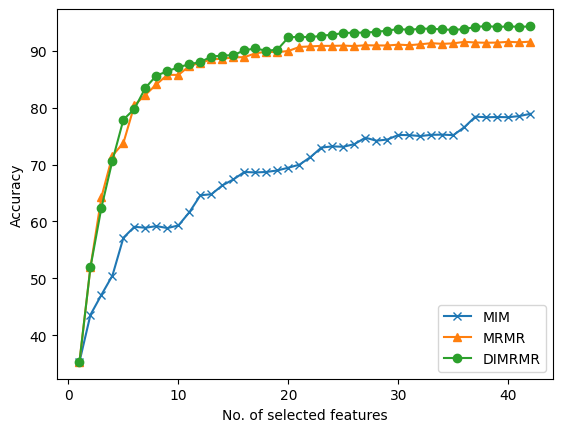

In [68]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()

In [69]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
print(mim_accuracy_results)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
print(mrmr_accuracy_results)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
print(dimrmr_accuracy_results)

running on MIM
features using: [195]


24.241883398729126
features using: [195, 179]
34.5446832644652
features using: [195, 179, 194]
39.76094077340648
features using: [195, 179, 194, 178]
42.93406021042397
features using: [195, 179, 194, 178, 189]
52.043705221246114
features using: [195, 179, 194, 178, 189, 209]
53.54900054400036
features using: [195, 179, 194, 178, 189, 209, 211]
54.215644061715096
features using: [195, 179, 194, 178, 189, 209, 211, 193]
54.90404759424518
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210]
55.22683657997385
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212]
55.796543861476664
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173]
59.19506464344828
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162]
62.475444749238974
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226]
62.1957591120062
features using: [195, 179, 194, 178, 189, 209, 211, 193, 210, 212, 173, 162, 226, 163]
63.314432214081506
fea

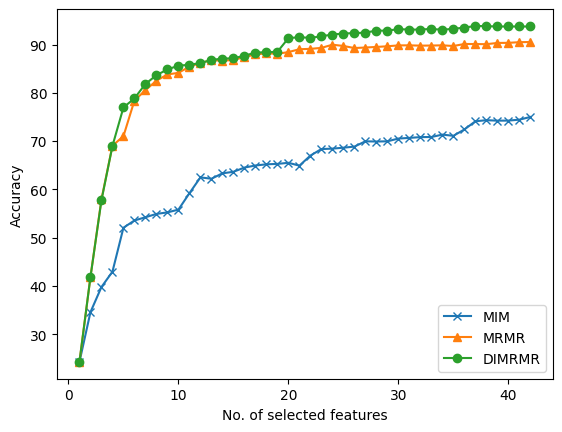

In [70]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()